# Simulation
$dr_t = a(b-r_t)dt+\sigma\sqrt r_tdW_t$  
$r_{t+1} - r_t = a(b-r_t)\Delta t+\sigma\sqrt r_t(W_{t+1}-W_t)$  

In [60]:
import numpy as np

def generate_weiner_diffs(n, delta):
    return [np.random.normal(loc=0.0, scale=np.sqrt(delta)) for _ in range(n)]

def single_iter(rt, a, b, delta, sigma, weiner_diff):
    return rt + a*(b-rt)*delta + sigma*np.sqrt(rt)*weiner_diff

def run_sim(n, a, b, r0, sigma, delta):
    output = [ r0 ]
    weiner_diffs = generate_weiner_diffs(n, delta)
    for i in range(n):
        output.append(single_iter(output[i], a, b, delta, sigma, weiner_diffs[i]))
    return output

In [80]:
a = 1
b = 1.1
r0 = 0
sigma = 0.09
delta = 0.01
N = 2000

test_run_1 = run_sim(N, a, b, r0, sigma, delta)
test_run_2 = run_sim(N, a, b, r0, sigma, delta)

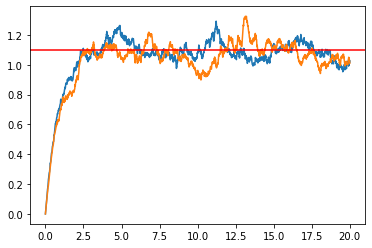

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

total_time = delta*N
time_axis = np.linspace(0, total_time, N+1) # N+1 to account for r0
plt.plot(time_axis.tolist(), test_run_1)
plt.plot(time_axis.tolist(), test_run_2)
plt.axhline(y=1.1, color='r', linestyle='-')

# OLS  
$dr_t= -kr_tdt+\sigma\sqrt{r_t+\gamma}dB_t$
  
**1.centralized:** $r_t = r_t^* - \gamma$  
  
Simple Discretisation: $$r_t = \Phi r_{t-1}+\sigma_a\sqrt{r_{t-1}+\gamma}a_t$$  
**2.1.Residual term:** $$\frac{(r_t - \Phi r_{t-1})^2}{r_t+\gamma}$$ 
Covariance equivalent discretisation process: $$r_t = \Phi r_{t-1}+\sigma_a\sqrt{\frac{2\Phi}{1+\Phi}r_{t-1}+\gamma}a_t$$  
**2.2.Residual term:** $$\frac{(r_t - \Phi r_{t-1})^2}{(\frac{2\Phi}{1+\Phi})\ r_t+\gamma}$$

In [227]:
def Residual_1(phi,data,gamma=1e-6):
    length = len(data)
    diff = data[1:length] - phi * data[0:length-1]
    RSS = np.power(diff,2)
    RSS = np.sum(RSS / np.abs(data[1:length]+gamma))
    return(RSS)

In [235]:
sta_data = test_run_1#[300:2000]
mean = np.mean(sta_data)
cen_data = sta_data - mean

#test function works
Residual_1(0.99,cen_data)

13.56589633919199

# 3. minimize $\phi$

In [236]:
import scipy.optimize as opt

In [277]:
def CIR_OLS_estimator(data,x0=1,gamma=0,delta=0.01):
    length = len(data)
    mean = np.mean(data)
    cen_data = sta_data - mean
    args = (cen_data,gamma)
    opt_res = opt.minimize(fun=Residual_1,x0=x0,args = args)
    est_phi = opt_res.x
    RSS = opt_res.fun
    est_sigmma = np.sqrt(opt_res.fun/length)
    print('estimated phi = {},estimated_sigmma = {}'.format(est_phi,est_sigmma),end = '\n')
    est_a = (1-est_phi) / delta
    print('estimated a = {},estimated_mean_b = {}'.format(est_a,b),end = '\n')
    return(est_phi)

In [278]:
sta_data = test_run_1[:500]#[500:1500]

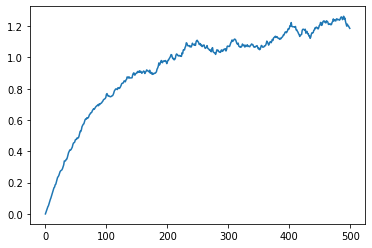

In [279]:
plt.plot(sta_data)

In [280]:
#up-trend to estimate a
sta_data = test_run_1[:500]
est_phi = CIR_OLS_estimator(sta_data)

estimated phi = [0.9891205],estimated_sigmma = 0.03274980786210403
estimated a = [1.08794992],estimated_mean_b = 1.1


In [281]:
#long-term to estimate sigmma(not good)
sta_data = test_run_1
est_phi = CIR_OLS_estimator(sta_data)

estimated phi = [0.92740264],estimated_sigmma = 0.08001150974031081
estimated a = [7.25973633],estimated_mean_b = 1.1


In [283]:
#OR use estimated a with long-term
sta_data = test_run_1
data = sta_data - np.mean(sta_data)
phi = 0.9891205
residual = Residual_1(phi,data,gamma=1e-6)
est_sigmma = np.sqrt(residual/len(data))
est_sigmma

0.08227394099031655